In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from wordcloud import WordCloud
import nltk
from PIL import Image

%matplotlib inline


In [9]:
!pip install wordcloud

In [13]:
data = pd.read_csv("avengers.csv",encoding = "latin-1")


In [14]:
data.head()

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   URL                          173 non-null    object
 1   Name/Alias                   163 non-null    object
 2   Appearances                  173 non-null    int64 
 3   Current?                     173 non-null    object
 4   Gender                       173 non-null    object
 5   Probationary Introl          15 non-null     object
 6   Full/Reserve Avengers Intro  159 non-null    object
 7   Year                         173 non-null    int64 
 8   Years since joining          173 non-null    int64 
 9   Honorary                     173 non-null    object
 10  Death1                       173 non-null    object
 11  Return1                      69 non-null     object
 12  Death2                       17 non-null     object
 13  Return2                      16 non

In [15]:
data.describe()

,Appearances,Year,Years since joining
count,173.000000,173.000000,173.000000
mean,414.052023,1988.445087,26.554913
std,677.991950,30.374669,30.374669
min,2.000000,1900.000000,0.000000
25%,58.000000,1979.000000,5.000000
50%,132.000000,1996.000000,19.000000
75%,491.000000,2010.000000,36.000000
max,4333.000000,2015.000000,115.000000


In [16]:
data.isnull().sum()

URL                              0
Name/Alias                      10
Appearances                      0
Current?                         0
Gender                           0
Probationary Introl            158
Full/Reserve Avengers Intro     14
Year                             0
Years since joining              0
Honorary                         0
Death1                           0
Return1                        104
Death2                         156
Return2                        157
Death3                         171
Return3                        171
Death4                         172
Return4                        172
Death5                         172
Return5                        172
Notes                           98
dtype: int64

In [17]:
data.columns

Index(['URL', 'Name/Alias', 'Appearances', 'Current?', 'Gender',
       'Probationary Introl', 'Full/Reserve Avengers Intro', 'Year',
       'Years since joining', 'Honorary', 'Death1', 'Return1', 'Death2',
       'Return2', 'Death3', 'Return3', 'Death4', 'Return4', 'Death5',
       'Return5', 'Notes'],
      dtype='object')

In [30]:
data.drop(['URL'],axis=1,inplace=True)

In [18]:
data.columns

Index(['URL', 'Name/Alias', 'Appearances', 'Current?', 'Gender',
       'Probationary Introl', 'Full/Reserve Avengers Intro', 'Year',
       'Years since joining', 'Honorary', 'Death1', 'Return1', 'Death2',
       'Return2', 'Death3', 'Return3', 'Death4', 'Return4', 'Death5',
       'Return5', 'Notes'],
      dtype='object')

In [19]:
# Chechking null values 
def about_data(df):
    df.info()
    total_missing_values = df.isnull().sum().reset_index()
    total_missing_values = total_missing_values.rename(columns={'index':'columns',0:'total missing'})
    total_missing_values['ration of missing'] = total_missing_values['total missing']/len(df)
    return total_missing_values

In [27]:
data.isnull().sum()

Name/Alias                      10
Appearances                      0
Current?                         0
Gender                           0
Probationary Introl            158
Full/Reserve Avengers Intro     14
Year                             0
Years since joining              0
Honorary                         0
Death1                           0
Return1                        104
Death2                         156
Return2                        157
Death3                         171
Return3                        171
Death4                         172
Return4                        172
Death5                         172
Return5                        172
Notes                           98
dtype: int64

In [20]:
about_data(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   URL                          173 non-null    object
 1   Name/Alias                   163 non-null    object
 2   Appearances                  173 non-null    int64 
 3   Current?                     173 non-null    object
 4   Gender                       173 non-null    object
 5   Probationary Introl          15 non-null     object
 6   Full/Reserve Avengers Intro  159 non-null    object
 7   Year                         173 non-null    int64 
 8   Years since joining          173 non-null    int64 
 9   Honorary                     173 non-null    object
 10  Death1                       173 non-null    object
 11  Return1                      69 non-null     object
 12  Death2                       17 non-null     object
 13  Return2                      16 non

,columns,total missing,ration of missing
0,URL,0,0.000000
1,Name/Alias,10,0.057803
2,Appearances,0,0.000000
3,Current?,0,0.000000
4,Gender,0,0.000000
5,Probationary Introl,158,0.913295
6,Full/Reserve Avengers Intro,14,0.080925
7,Year,0,0.000000
8,Years since joining,0,0.000000
9,Honorary,0,0.000000


In [21]:
data.drop('Probationary Introl',axis=1,inplace=True)

In [22]:
data['Death1'].fillna('Never Happen', inplace = True)
data['Death2'].fillna('Never Happen', inplace = True) 
data['Death3'].fillna('Never Happen', inplace = True) 
data['Death4'].fillna('Never Happen', inplace = True) 
data['Death5'].fillna('Never Happen', inplace = True) 
data['Return1'].fillna('Never Happen', inplace = True)
data['Return2'].fillna('Never Happen', inplace = True) 
data['Return3'].fillna('Never Happen', inplace = True) 
data['Return4'].fillna('Never Happen', inplace = True) 
data['Return5'].fillna('Never Happen', inplace = True) 
data["Full/Reserve Avengers Intro"].fillna('Unknown', inplace = True)

In [23]:
data.Notes = data.Notes.str.replace("_"," ")

In [24]:
data.isnull().sum()

URL                             0
Name/Alias                     10
Appearances                     0
Current?                        0
Gender                          0
Full/Reserve Avengers Intro     0
Year                            0
Years since joining             0
Honorary                        0
Death1                          0
Return1                         0
Death2                          0
Return2                         0
Death3                          0
Return3                         0
Death4                          0
Return4                         0
Death5                          0
Return5                         0
Notes                          98
dtype: int64

In [25]:
data["Name/Alias"].fillna('Unknown', inplace = True) 

In [26]:
data.isnull().sum()

URL                             0
Name/Alias                      0
Appearances                     0
Current?                        0
Gender                          0
Full/Reserve Avengers Intro     0
Year                            0
Years since joining             0
Honorary                        0
Death1                          0
Return1                         0
Death2                          0
Return2                         0
Death3                          0
Return3                         0
Death4                          0
Return4                         0
Death5                          0
Return5                         0
Notes                          98
dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

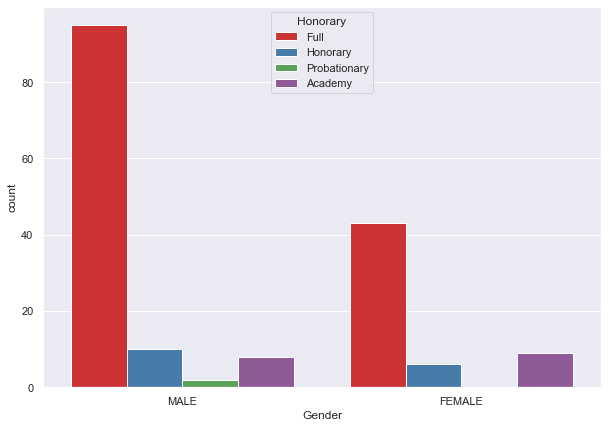

In [27]:
sns.set(rc={'figure.figsize':(10,7)})
sns.countplot(data = data, x="Gender",hue="Honorary",palette='Set1')

<AxesSubplot:xlabel='Current?', ylabel='count'>

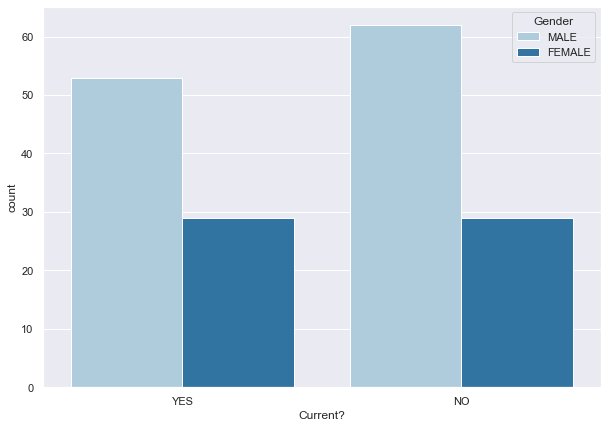

In [28]:
sns.set(rc={'figure.figsize':(10,7)})
sns.countplot(data = data, x="Current?",hue="Gender",palette='Paired')

In [29]:
def disturbition(x,title):
    plt.figure(figsize=(10,8))
    ax = sns.distplot(x, kde=False,bins=30)
    values = np.array([rec.get_height() for rec in ax.patches])
    norm = plt.Normalize(values.min(), values.max())
    colors = plt.cm.jet(norm(values))
    for rec, col in zip(ax.patches,colors):
        rec.set_color(col)
    plt.title(title, size=20, color='black')


C:\Users\UMMER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


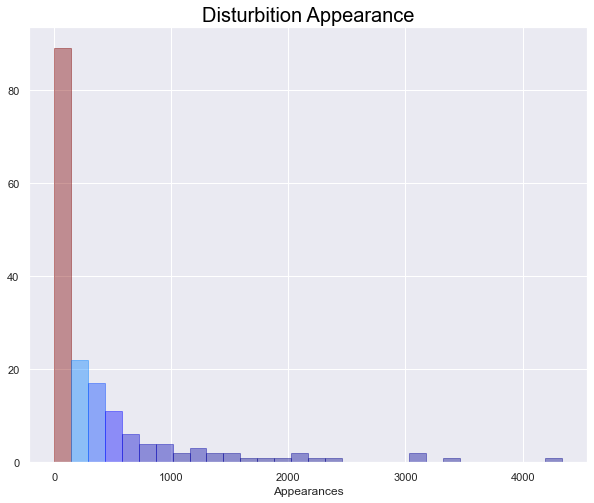

In [47]:
disturbition(data.Appearances,"Disturbition Appearance")

Lets Looking for which charachter is still alive and which is death

<AxesSubplot:xlabel='Current?', ylabel='Years since joining'>

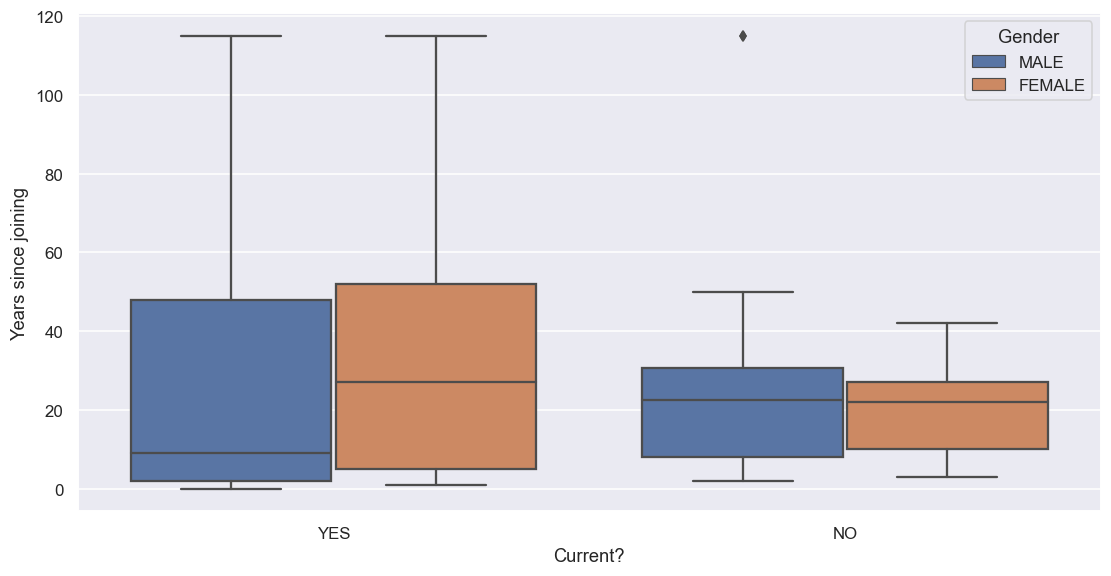

In [30]:
plt.figure(figsize=(12,6),dpi=110)
sns.boxplot(y='Years since joining',x='Current?',hue="Gender",data=data)

In [31]:
still_alive = data[data['Notes'].isnull()]
death = data[data['Notes'].notnull()]

In [49]:
death.head()

,Name/Alias,Appearances,Current?,Gender,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,Death1,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,Sep-63,1963,52,Full,YES,NO,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,Janet van Dyne,1165,YES,FEMALE,Sep-63,1963,52,Full,YES,YES,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Dies in Secret Invasion V1:I8. Actually was se...
2,"Anthony Edward ""Tony"" Stark",3068,YES,MALE,Sep-63,1963,52,Full,YES,YES,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,"Death: ""Later while under the influence of Imm..."
3,Robert Bruce Banner,2089,YES,MALE,Sep-63,1963,52,Full,YES,YES,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,"Dies in Ghosts of the Future arc. However ""he ..."
4,Thor Odinson,2402,YES,MALE,Sep-63,1963,52,Full,YES,YES,YES,NO,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Dies in Fear Itself brought back because that'...


<AxesSubplot:xlabel='Gender', ylabel='count'>

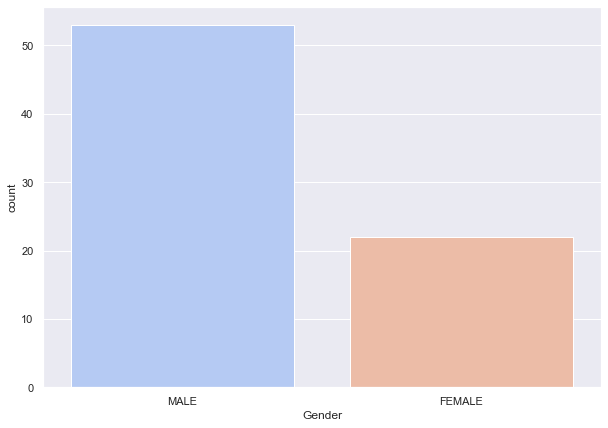

In [32]:
sns.set(rc={'figure.figsize':(10,7)})
sns.countplot(data = death, x="Gender",palette='coolwarm')

In [33]:
still_alive.head()

,URL,Name/Alias,Appearances,Current?,Gender,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,Death1,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
5,http://marvel.wikia.com/Richard_Jones_(Earth-616),Richard Milhouse Jones,612,YES,MALE,Sep-63,1963,52,Honorary,NO,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,NaN
11,http://marvel.wikia.com/Hercules_(Earth-616),Heracles,741,YES,MALE,Oct-67,1967,48,Full,NO,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,NaN
12,http://marvel.wikia.com/T%27Challa_(Earth-616),T'Challa,780,NO,MALE,May-68,1968,47,Full,NO,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,NaN
14,http://marvel.wikia.com/Dane_Whitman,Dane Whitman,482,NO,MALE,Dec-69,1969,46,Full,NO,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,NaN
17,http://marvel.wikia.com/Henry_McCoy_(Earth-616)#,Henry P. McCoy,1886,NO,MALE,Sep-76,1976,39,Full,NO,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,Never Happen,NaN


<AxesSubplot:xlabel='Gender', ylabel='count'>

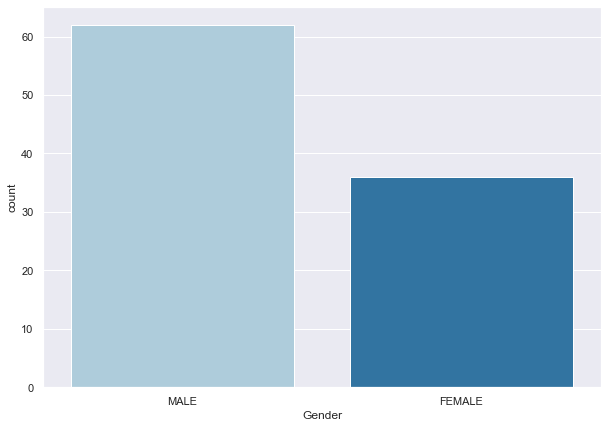

In [34]:
sns.set(rc={'figure.figsize':(10,7)})
sns.countplot(data = still_alive, x="Gender",palette='Paired')

##### WordCLoud

In [35]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [40]:
mask = np.array(Image.open(r'C:\Users\UMMER\Downloads\png-clipart-avengers-age-of-ultron-logo-avengers-logo-thumbnail.png'))
transformed = np.ndarray((mask.shape[0],mask.shape[1]), np.int32)

for i in range(len(mask)):
    transformed[i] = list(map(transform_format,mask[i]))

In [43]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\UMMER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

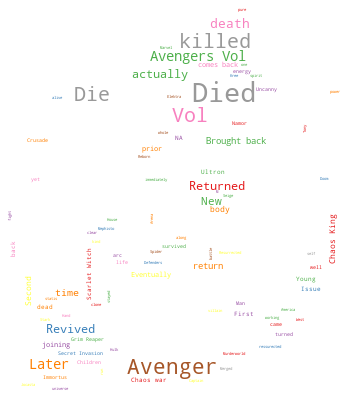

In [44]:
cloud_data = ' '.join([line for line in death.Notes])
stopword = nltk.corpus.stopwords.words('english')

# plot the WordCloud image                       
wc = WordCloud(background_color='white', max_words=2000, mask=transformed,colormap='Set1')
wc.generate(cloud_data)
wc.to_file('word_cloud.png')
wc.to_image()

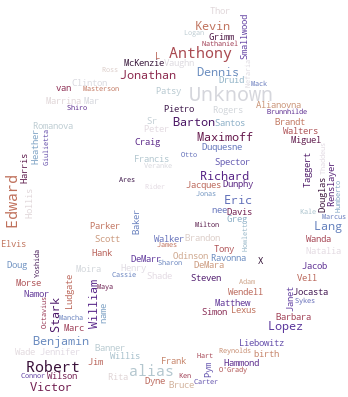

In [45]:
names = data.dropna()
cloud_data = ' '.join([line for line in names['Name/Alias']])
stopword = nltk.corpus.stopwords.words('english')

# plot the WordCloud image                       
wc = WordCloud(background_color='white', max_words=2000, mask=transformed,colormap='twilight_shifted_r')
wc.generate(cloud_data)
wc.to_file('word_cloud_ironman.png')
wc.to_image()

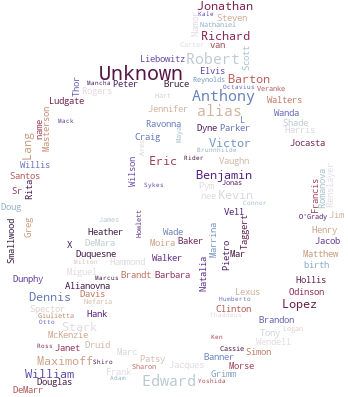

In [46]:
names = data.dropna()
cloud_data = ' '.join([line for line in names['Name/Alias']])
stopword = nltk.corpus.stopwords.words('english')

# plot the WordCloud image                       
wc = WordCloud(background_color='white', max_words=2000, mask=transformed,colormap='twilight_shifted_r')
wc.generate(cloud_data)
wc.to_file('word_cloud_ironman.png')
wc.to_image()